**Task:** Data analysis of a Titanic dataset with Pandas

Download Titanic dataset

Load data to pandas dataframe

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
titanic_dataset = pd.read_excel('Data/titanic.xls')

In [7]:
titanic_dataset

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


# Please, answer the following questions with code and output or visualizations below each question.

### What  is  the  passenger  sex  distribution? 

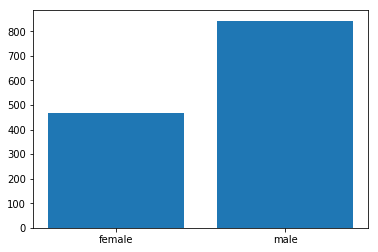

In [29]:
title, count = np.unique(titanic_dataset.loc[:, 'sex'], return_counts=True)
plt.bar(title, count)
plt.show()

### What  is  the  passenger  service  class  distribution? 

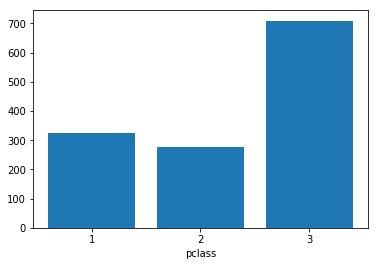

In [35]:
title, count = np.unique(titanic_dataset.loc[:, 'pclass'].astype(str), return_counts=True)
plt.bar(title, count)
plt.xlabel('pclass')
plt.show()

### How  does  the  mean  male  age  change  in  dependence  on  service  class? 

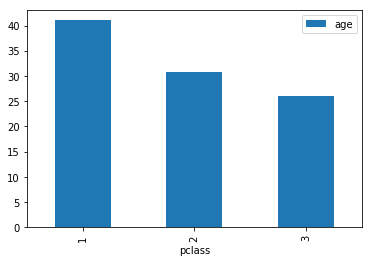

In [33]:
titanic_dataset[titanic_dataset.loc[:, 'sex'] == 'male'].groupby('pclass').agg({'age': np.mean}).plot.bar()

### How  does  the  mean  female  age  change  in  dependence  on  service  class? 

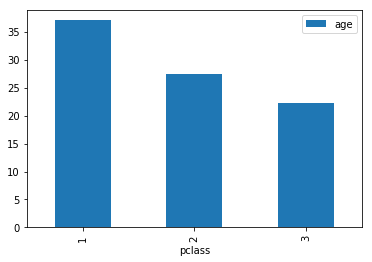

In [34]:
titanic_dataset[titanic_dataset.loc[:, 'sex'] == 'female'].groupby('pclass').agg({'age': np.mean}).plot.bar()

### What  is  the  proportion  of  survived  passengers?

In [52]:
titanic_dataset[titanic_dataset.loc[:, 'survived']==1].shape[0]/titanic_dataset.shape[0]

0.3819709702062643

### Is  it  true,  that  younger  passengers  survived  more  frequently  than  older passengers?
To answer this question you need to plot survival rate with respect to passenger age. Graph should be smooth to be interpretable.

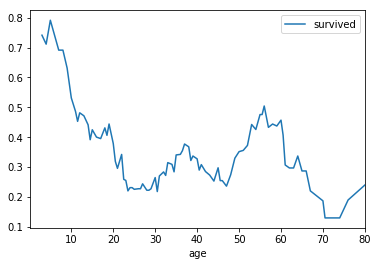

In [62]:
titanic_dataset.pivot_table('survived', index=['age']).rolling(10).mean().plot()

### Is  it  true,  that  women  survived  more  frequently? 

In [98]:
titanic_dataset.groupby('sex')['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

### What  is  the  mean  of  the  fare?  What  is  the  variance  of  the  fare? 

In [103]:
titanic_dataset['fare'].agg({np.mean, np.std})

mean    33.295479
std     51.758668
Name: fare, dtype: float64

### Is  it  true,  that  passengers  with  more  expensive  tickets  survived  more frequently?
To answer this question you need to plot survival rate with respect to fare. Graph should be smooth to be interpretable.

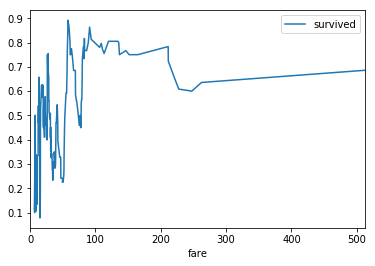

In [112]:
titanic_dataset.pivot_table('survived', index=['fare']).rolling(10).mean().plot()

### What  is  most  popular  male  name  on  the  ship? 
Don't account for surnames, titles, etc.

In [121]:
titanic_dataset[titanic_dataset['sex'] == 'male']['name'].str.extract('(Mr\. |Miss\. |Master. |Mrs\.[A-Za-z ]*\()([A-Za-z]*)')[1].value_counts().index[0]

'William'